In [45]:
# Data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model saving/loading
import joblib

# Category encoders
from category_encoders import OneHotEncoder, TargetEncoder

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Scikit-Learn pipeline and transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# Scikit-Learn models
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Scikit-Learn model selection
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split
)

# Scikit-Learn metrics
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    recall_score,
    roc_auc_score,
    roc_curve
)


# EDA ( Exploratory Data Analysis)

In [46]:
data = pd.read_csv ('data/train.csv')

In [47]:
data.head()

,id,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,External Heart Test Score,Weekly PhysicalActivity (H),HeartDisease
0,392260,20.51,No,No,No,4.0,0.0,No,Female,48,White,No,NaN,8.0,No,No,No,-0.087426,9.0,0
1,240472,30.82,No,No,No,0.0,0.0,No,Female,71,Other,Yes,Very good,7.0,No,Yes,No,-0.243885,12.0,0
2,212573,33.91,No,No,No,0.0,0.0,No,Male,54,White,Yes,Good,6.0,No,No,No,-0.010218,1.0,0
3,233946,21.59,Yes,No,No,0.0,0.0,No,Male,84,White,No,Very good,8.0,No,No,No,-0.076278,11.0,0
4,427190,25.75,No,No,No,0.0,0.0,No,Female,77,White,No,Very good,7.0,Yes,No,No,-0.063184,10.0,0


In [48]:
data.columns

Index(['id', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'Age', 'Race', 'Diabetic',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'External Heart Test Score', 'Weekly PhysicalActivity (H)',
       'HeartDisease'],
      dtype='object')

In [49]:
data.shape

(223856, 20)

In [50]:
data.dtypes

id                               int64
BMI                            float64
Smoking                         object
AlcoholDrinking                 object
Stroke                          object
PhysicalHealth                 float64
MentalHealth                   float64
DiffWalking                     object
Sex                             object
Age                              int64
Race                            object
Diabetic                        object
GenHealth                       object
SleepTime                      float64
Asthma                          object
KidneyDisease                   object
SkinCancer                      object
External Heart Test Score      float64
Weekly PhysicalActivity (H)    float64
HeartDisease                     int64
dtype: object

In [51]:
data.describe()

,id,BMI,PhysicalHealth,MentalHealth,Age,SleepTime,External Heart Test Score,Weekly PhysicalActivity (H),HeartDisease
count,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,221832.000000,223856.000000,223856.000000,223856.000000
mean,222302.868094,28.330314,3.362152,3.899708,55.074244,7.096578,0.085433,6.857699,0.085247
std,128284.282134,6.360185,7.934836,7.958319,19.025598,1.440473,0.303383,4.651937,0.279249
min,1.000000,12.020000,0.000000,0.000000,18.000000,-3.000000,-0.563692,0.000000,0.000000
25%,111213.750000,24.030000,0.000000,0.000000,40.000000,6.000000,-0.071873,2.000000,0.000000
50%,222506.000000,27.340000,0.000000,0.000000,57.000000,7.000000,0.014665,9.000000,0.000000
75%,333357.500000,31.450000,2.000000,3.000000,69.000000,8.000000,0.110031,11.000000,0.000000
max,444443.000000,93.970000,30.000000,30.000000,99.000000,48.000000,1.461253,14.000000,1.000000


In [52]:
data.nunique()

id                             223856
BMI                              3355
Smoking                             2
AlcoholDrinking                     2
Stroke                              2
PhysicalHealth                     31
MentalHealth                       31
DiffWalking                         2
Sex                                12
Age                                82
Race                                6
Diabetic                            4
GenHealth                           5
SleepTime                          27
Asthma                              2
KidneyDisease                       2
SkinCancer                          2
External Heart Test Score      223856
Weekly PhysicalActivity (H)        15
HeartDisease                        2
dtype: int64

In [53]:
data.isna().sum()

id                                 0
BMI                                0
Smoking                            0
AlcoholDrinking                    0
Stroke                             0
PhysicalHealth                     0
MentalHealth                       0
DiffWalking                        0
Sex                             1900
Age                                0
Race                            4032
Diabetic                           0
GenHealth                      35000
SleepTime                       2024
Asthma                             0
KidneyDisease                      0
SkinCancer                      2205
External Heart Test Score          0
Weekly PhysicalActivity (H)        0
HeartDisease                       0
dtype: int64

Numerical Columns

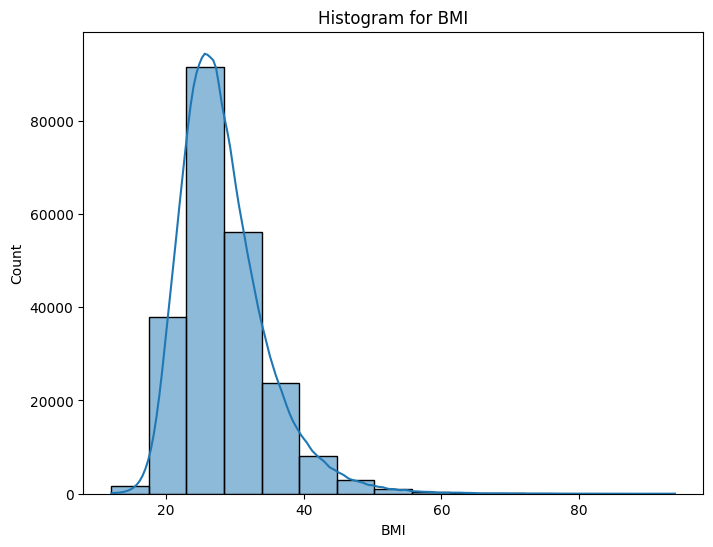

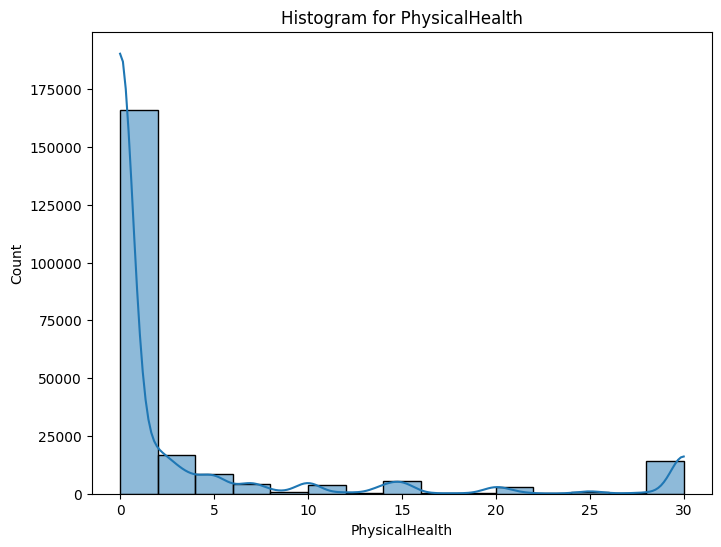

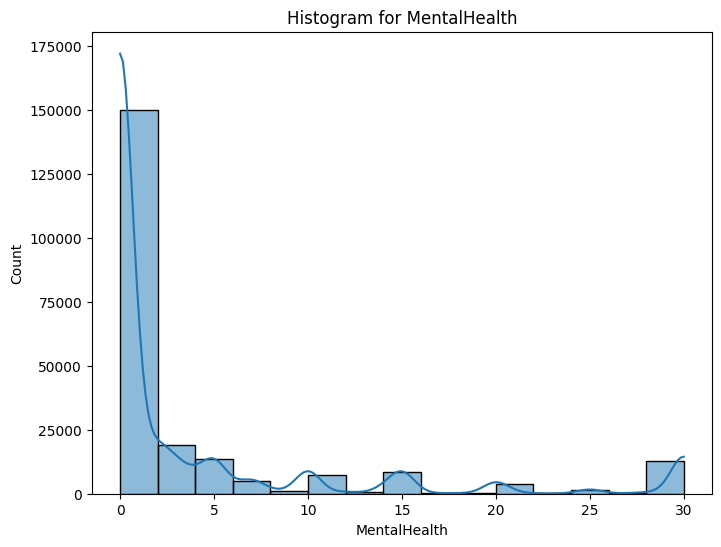

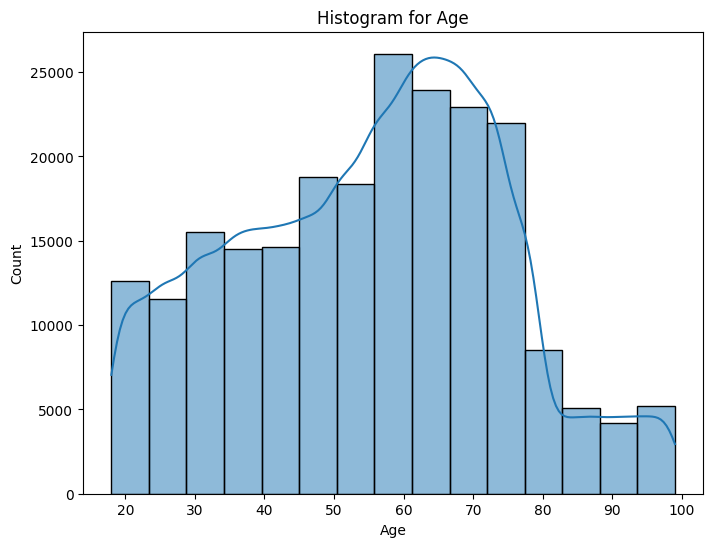

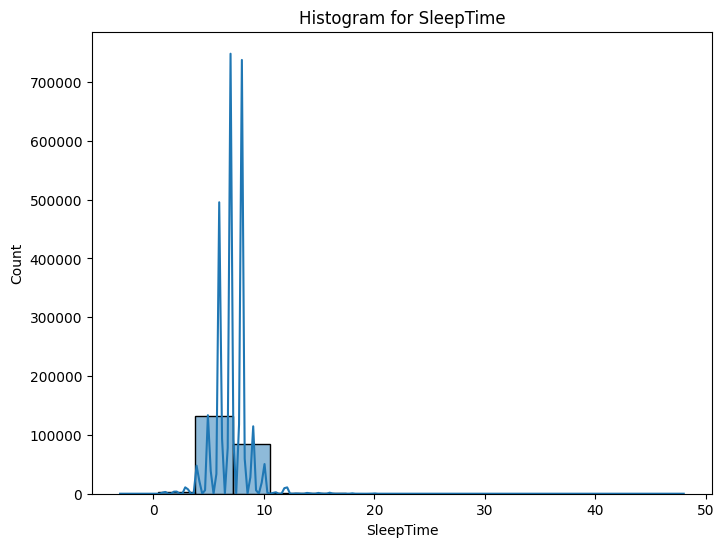

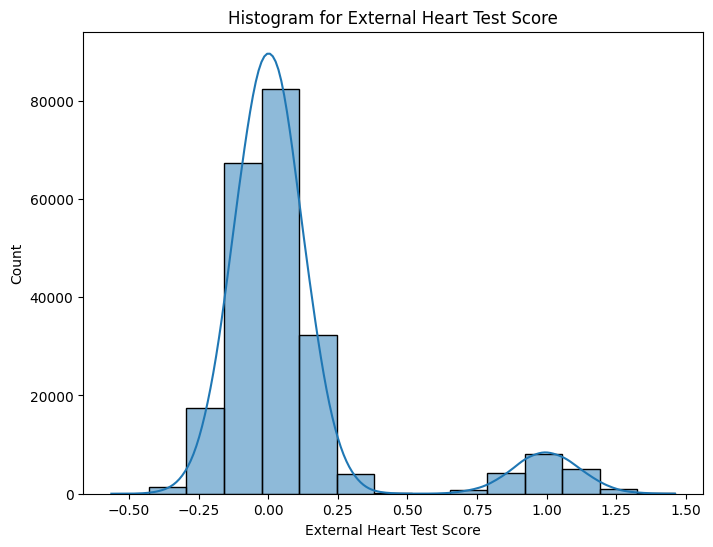

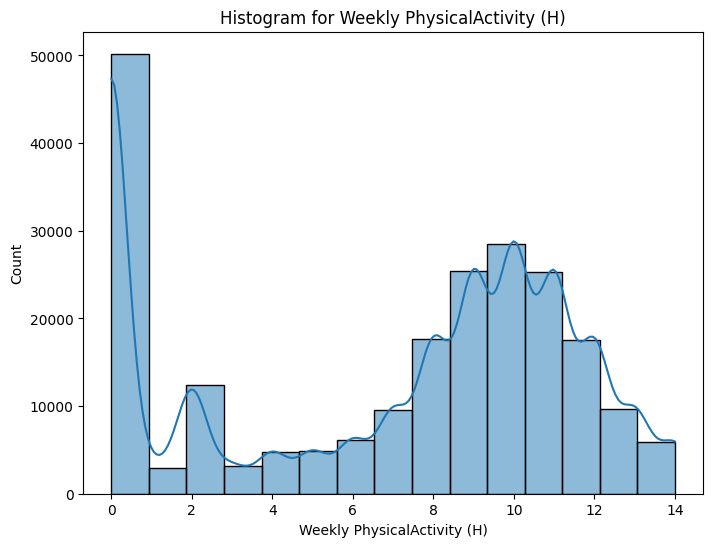

In [54]:
# Select numerical columns, excluding 'id' and 'HeartDisease'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['id', 'HeartDisease'])  # Exclude 'id' and 'HeartDisease'

# Create histograms for each remaining numerical variable
for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    sns.histplot(data[col], kde=True, bins=15)  # kde=True adds a density curve
    plt.title(f'Histogram for {col}')  # Set the title for each histogram
    plt.show()  # Display the plot

In [55]:
# Detect outliers using the IQR method and replace them with the median
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)  # First quartile (25%)
    Q3 = data[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound

    # Calculate the median for the column
    median_value = data[col].median()

    # Replace outliers with the median
    data[col] = data[col].where((data[col] >= lower_bound) & (data[col] <= upper_bound), median_value)

In [56]:
#Define the bin edges
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100] 
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']

# Create a new column for BMI categories using pd.cut()
data['BMI'] = pd.cut(data['BMI'], bins=bins, labels=labels, right=True)

In [57]:
age_bins = [18, 35, 50, 65, 100]  
age_labels = ['18-34', '35-49', '50-64', '65-100']

# Create a new column for age categories using pd.cut()
data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)

In [58]:
data.describe()

,id,PhysicalHealth,MentalHealth,SleepTime,External Heart Test Score,Weekly PhysicalActivity (H),HeartDisease
count,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000
mean,222302.868094,0.381701,0.670087,7.055804,0.002099,6.857699,0.085247
std,128284.282134,1.063122,1.577086,1.223790,0.113064,4.651937,0.279249
min,1.000000,0.000000,0.000000,3.000000,-0.344716,0.000000,0.000000
25%,111213.750000,0.000000,0.000000,6.000000,-0.071135,2.000000,0.000000
50%,222506.000000,0.000000,0.000000,7.000000,0.014665,9.000000,0.000000
75%,333357.500000,0.000000,0.000000,8.000000,0.072397,11.000000,0.000000
max,444443.000000,5.000000,7.000000,11.000000,0.382765,14.000000,1.000000


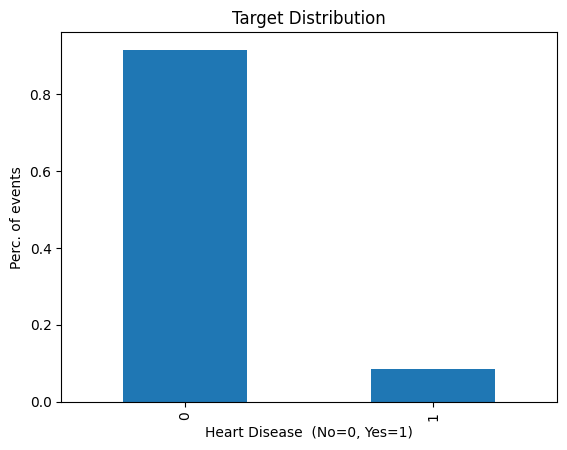

In [59]:
# Checking if the dataset is imbalanced 
data["HeartDisease"].value_counts(normalize=True).plot(kind="bar")
plt.title('Target Distribution')
plt.xlabel("Heart Disease  (No=0, Yes=1)")
plt.ylabel("Perc. of events");

Categorical Columns

In [60]:
# Identify columns that are of type 'object' (or categorical)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Display the unique values of each categorical column
for col in categorical_columns:
    print(f"Unique values of '{col}':")
    print(data[col].unique())
    print("\n")

Unique values of 'BMI':
['Normal weight', 'Obesity Class I', 'Overweight', 'Obesity Class II', 'Obesity Class III', 'Underweight']
Categories (6, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obesity Class I' < 'Obesity Class II' < 'Obesity Class III']


Unique values of 'Smoking':
['No' 'Yes']


Unique values of 'AlcoholDrinking':
['No' 'Yes']


Unique values of 'Stroke':
['No' 'Yes']


Unique values of 'DiffWalking':
['No' 'Yes']


Unique values of 'Sex':
['Female' 'Male' 'M' 'f' 'female' 'male' nan 'F' 'm' 'Uknown' 'banana'
 'Unicorn' 'Whenever I have the opportunity']


Unique values of 'Age':
['35-49', '65-100', '50-64', '18-34', NaN]
Categories (4, object): ['18-34' < '35-49' < '50-64' < '65-100']


Unique values of 'Race':
['White' 'Other' 'Black' 'Hispanic' 'American Indian/Alaskan Native' nan
 'Asian']


Unique values of 'Diabetic':
['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']


Unique values of 'GenHealth':
[nan 'Very good' 'Good' 'Poor' 'Fair

In [61]:
# Example DataFrame (replace with your own DataFrame)
# Normalizing the values in the 'Sex' column
data['Sex'] = data['Sex'].str.lower()  # Converts all values to lowercase

# Replacing variations of 'male' and 'female'
data['Sex'] = data['Sex'].replace({
    'm': 'male',
    'f': 'female',
    'male': 'male',
    'female': 'female'
})

# Handling invalid values like 'banana', 'Uknown', 'unicorn', and 'whenever I have the opportunity'
data['Sex'] = data['Sex'].replace({
    'unicorn': np.nan,
    'whenever i have the opportunity': np.nan,
    'banana': np.nan,
    'uknown': np.nan
})

# Removing rows with NaN values in the 'Sex' column
data = data.dropna(subset=['Sex'])




In [62]:
# Replace values in the 'Diabetic' column to standardize it to 'Yes' and 'No'
data['Diabetic'] = data['Diabetic'].replace({
    'No': 'No',
    'No, borderline diabetes': 'No',
    'Yes': 'Yes',
    'Yes (during pregnancy)': 'Yes'
})

# Optionally, check the unique values after the replacement
print("Unique values of 'Diabetic' after treatment:")
print(data['Diabetic'].unique())


Unique values of 'Diabetic' after treatment:
['No' 'Yes']


In [63]:
# Convert all column names to lowercase
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Convert all string values in the DataFrame to lowercase
data = data.applymap(lambda x: x.lower().replace(' ', '_') if isinstance(x, str) else x)

data.head()

/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_75173/4035033781.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower().replace(' ', '_') if isinstance(x, str) else x)


,id,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,age,race,diabetic,genhealth,sleeptime,asthma,kidneydisease,skincancer,external_heart_test_score,weekly_physicalactivity_(h),heartdisease
0,392260,normal_weight,no,no,no,4.0,0.0,no,female,35-49,white,no,NaN,8.0,no,no,no,-0.087426,9.0,0
1,240472,obesity_class_i,no,no,no,0.0,0.0,no,female,65-100,other,yes,very_good,7.0,no,yes,no,-0.243885,12.0,0
2,212573,obesity_class_i,no,no,no,0.0,0.0,no,male,50-64,white,yes,good,6.0,no,no,no,-0.010218,1.0,0
3,233946,normal_weight,yes,no,no,0.0,0.0,no,male,65-100,white,no,very_good,8.0,no,no,no,-0.076278,11.0,0
4,427190,overweight,no,no,no,0.0,0.0,no,female,65-100,white,no,very_good,7.0,yes,no,no,-0.063184,10.0,0


In [64]:
data.shape

(221853, 20)

In [65]:
data.columns

Index(['id', 'bmi', 'smoking', 'alcoholdrinking', 'stroke', 'physicalhealth',
       'mentalhealth', 'diffwalking', 'sex', 'age', 'race', 'diabetic',
       'genhealth', 'sleeptime', 'asthma', 'kidneydisease', 'skincancer',
       'external_heart_test_score', 'weekly_physicalactivity_(h)',
       'heartdisease'],
      dtype='object')

In [66]:
data.isna().sum()

id                                 0
bmi                                0
smoking                            0
alcoholdrinking                    0
stroke                             0
physicalhealth                     0
mentalhealth                       0
diffwalking                        0
sex                                0
age                             2091
race                            3999
diabetic                           0
genhealth                      34696
sleeptime                          0
asthma                             0
kidneydisease                      0
skincancer                      2186
external_heart_test_score          0
weekly_physicalactivity_(h)        0
heartdisease                       0
dtype: int64

In [67]:
columns_to_drop = ['external_heart_test_score', 'race', 'sleeptime', 'mentalhealth', 'skincancer', 'asthma', 'genhealth']
data.drop(columns=columns_to_drop, inplace=True)

In [68]:
data.isna().sum()

id                                0
bmi                               0
smoking                           0
alcoholdrinking                   0
stroke                            0
physicalhealth                    0
diffwalking                       0
sex                               0
age                            2091
diabetic                          0
kidneydisease                     0
weekly_physicalactivity_(h)       0
heartdisease                      0
dtype: int64

In [69]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert categorical variables using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Calculate the correlation
correlation_matrix = data_encoded.corr()
heart_disease_correlation = correlation_matrix['heartdisease'].sort_values(ascending=False)

# Display correlation with HeartDisease
print("Correlation with HeartDisease:")
print(heart_disease_correlation)


Correlação com HeartDisease:
heartdisease                   1.000000
age_65-100                     0.209318
diffwalking_yes                0.202476
stroke_yes                     0.195511
diabetic_yes                   0.176726
kidneydisease_yes              0.147179
smoking_yes                    0.106665
sex_male                       0.072164
bmi_obesity_class_i            0.025980
bmi_obesity_class_ii           0.023334
physicalhealth                 0.011816
bmi_obesity_class_iii          0.010266
bmi_overweight                 0.010000
id                            -0.000825
age_50-64                     -0.008734
alcoholdrinking_yes           -0.033195
bmi_normal_weight             -0.049610
age_35-49                     -0.104241
weekly_physicalactivity_(h)   -0.357862
Name: heartdisease, dtype: float64


In [70]:
# Separate features and target variable
X = data_encoded.drop('heartdisease', axis=1)  # Features (excluding target)
y = data_encoded['heartdisease']  # Target variable

# Define the desired ratio
sampling_ratio = 0.5  

# Instantiate SMOTE with a custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_ratio, random_state=42)

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a DataFrame
data = pd.DataFrame(X_resampled, columns=X.columns)
data['heartdisease'] = y_resampled

# Check the new class distribution
print(data['heartdisease'].value_counts())

heartdisease
0    202936
1    101468
Name: count, dtype: int64


In [71]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert categorical variables using One-Hot Encoding
data_model = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [72]:
# Set the 'id' column as the index of the DataFrame
data_model = data_model.set_index('id')

# Sort the DataFrame columns in alphabetical order
data_model = data_model.sort_index(axis=1)


In [73]:
data_model.shape

(304404, 18)

In [74]:
data_model.columns

Index(['age_35-49', 'age_50-64', 'age_65-100', 'alcoholdrinking_yes',
       'bmi_normal_weight', 'bmi_obesity_class_i', 'bmi_obesity_class_ii',
       'bmi_obesity_class_iii', 'bmi_overweight', 'diabetic_yes',
       'diffwalking_yes', 'heartdisease', 'kidneydisease_yes',
       'physicalhealth', 'sex_male', 'smoking_yes', 'stroke_yes',
       'weekly_physicalactivity_(h)'],
      dtype='object')

# Model

Logistic Regression

In [75]:
X = data_model.drop(columns=['heartdisease'])
y = data_model['heartdisease']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Training Accuracy: 0.921
Test Accuracy: 0.921
Test Recall: 0.847
Cross-Validation Scores: [0.73855554 0.95287528 0.95210328 0.95243179 0.95372865]
Mean CV Score: 0.910


/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/miguelmendes/.virtualenvs/s01/lib/pyt

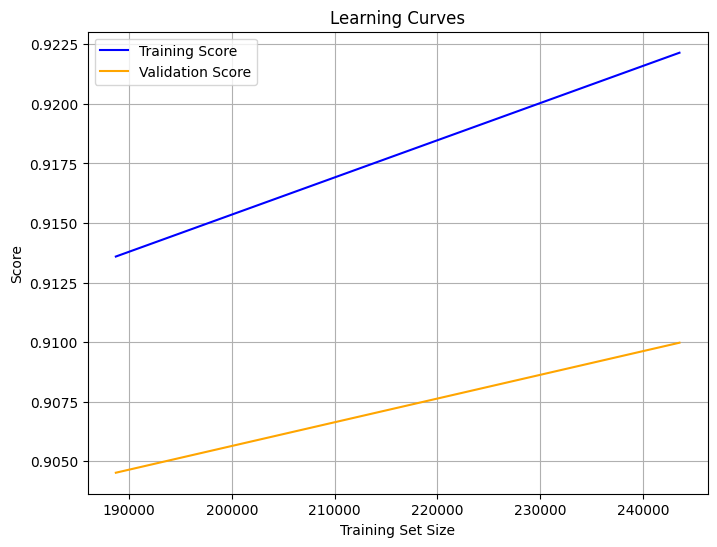

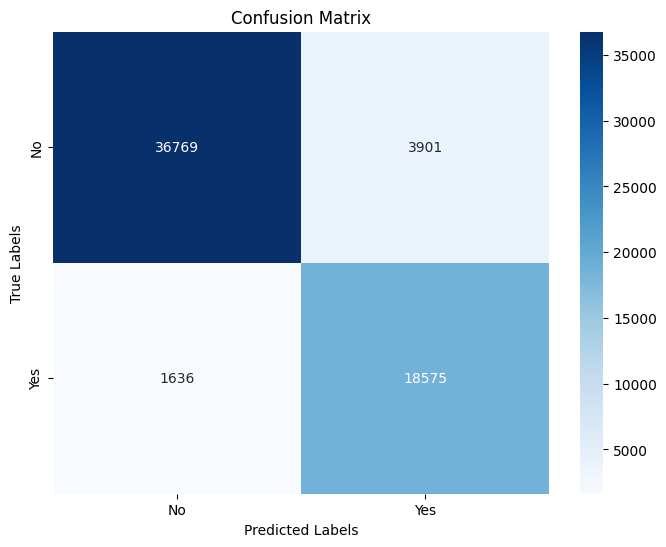

AUC: 0.976


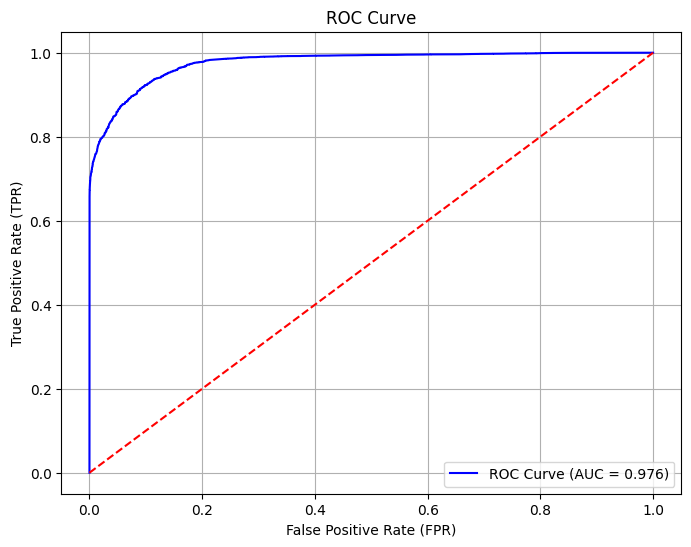

In [77]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Recall: {test_recall:.3f}')

# Perform k-fold cross-validation
cv_scores = cross_val_score(logistic_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.3f}')

# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5)

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting Learning Curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# Calculate the confusion matrix
threshold = 0.3  # Set a threshold for binary classification
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to class labels

cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')  # X-axis label
plt.ylabel('True Labels')       # Y-axis label
plt.title('Confusion Matrix')   # Title of the plot
plt.show()                      # Display the plot

# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC value
print(f'AUC: {auc:.3f}')  # Display the AUC value with three decimal places

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate (FPR)')  # X-axis label
plt.ylabel('True Positive Rate (TPR)')    # Y-axis label
plt.title('ROC Curve')                     # Title of the plot
plt.legend(loc='lower right')              # Legend location
plt.grid()                                 # Add a grid for better readability
plt.show()                                 # Display the plot


Gradient Boosting

Training Accuracy: 0.958
Test Accuracy: 0.957
Test Recall: 0.921
Cross-Validation Scores: [0.81884332 0.97409701 0.97426126 0.97468833 0.97605125]
Mean CV Score: 0.944


/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/miguelmendes/.virtualenvs/s01/lib/pyt

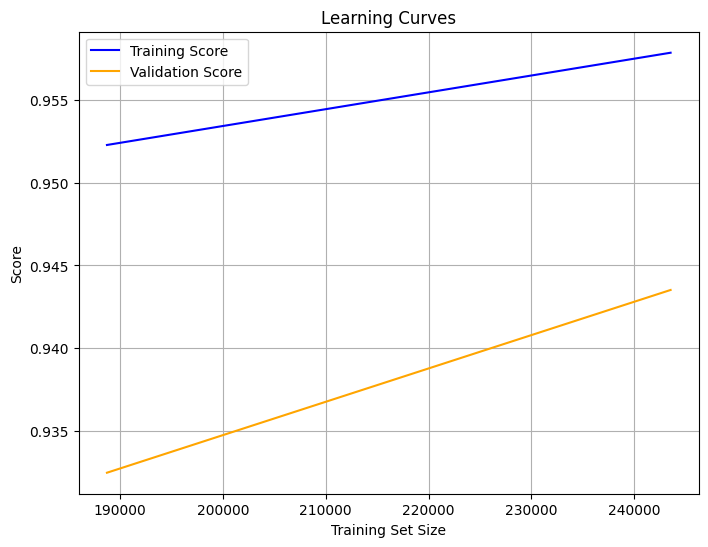

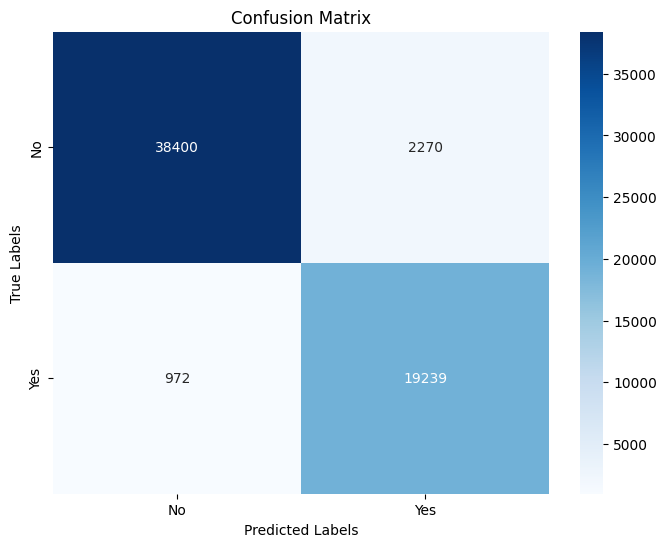

AUC: 0.991


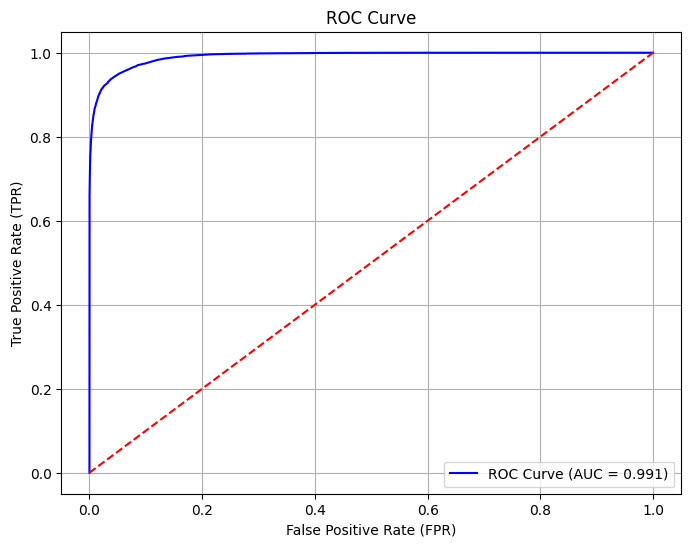

In [78]:

# Create and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = gradient_boosting_model.predict(X_train)
y_test_pred = gradient_boosting_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Recall: {test_recall:.3f}')  # Print Recall

# Perform k-fold cross-validation
cv_scores = cross_val_score(gradient_boosting_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.3f}')

# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_model, X, y, cv=5)

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting Learning Curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# Calculate the confusion matrix
threshold = 0.3  # Set a threshold for binary classification
y_pred_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to class labels

cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')  # X-axis label
plt.ylabel('True Labels')       # Y-axis label
plt.title('Confusion Matrix')   # Title of the plot
plt.show()                      # Display the plot

# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC value
print(f'AUC: {auc:.3f}')  # Display the AUC value with three decimal places

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate (FPR)')  # X-axis label
plt.ylabel('True Positive Rate (TPR)')    # Y-axis label
plt.title('ROC Curve')                     # Title of the plot
plt.legend(loc='lower right')              # Legend location
plt.grid()                                 # Add a grid for better readability
plt.show()                                 # Display the plot


Random Forest Classifier

Training Accuracy: 0.965
Test Accuracy: 0.956
Test Recall: 0.916
Cross-Validation Scores: [0.77252345 0.97867972 0.97858117 0.97844976 0.97958279]
Mean CV Score: 0.938


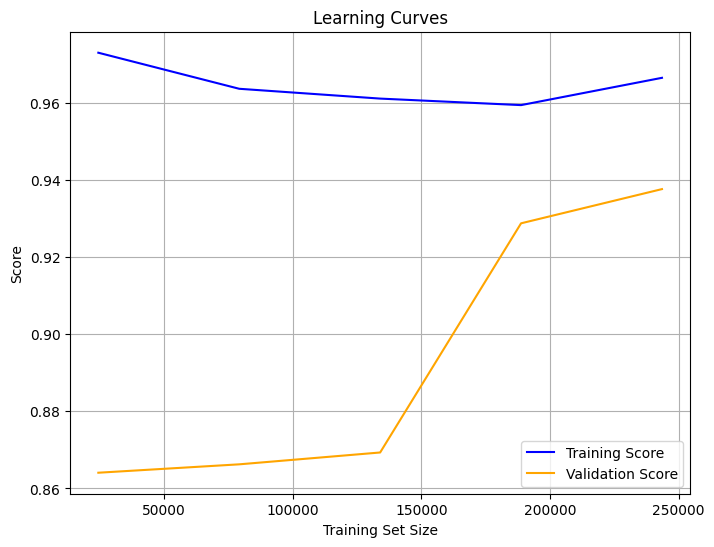

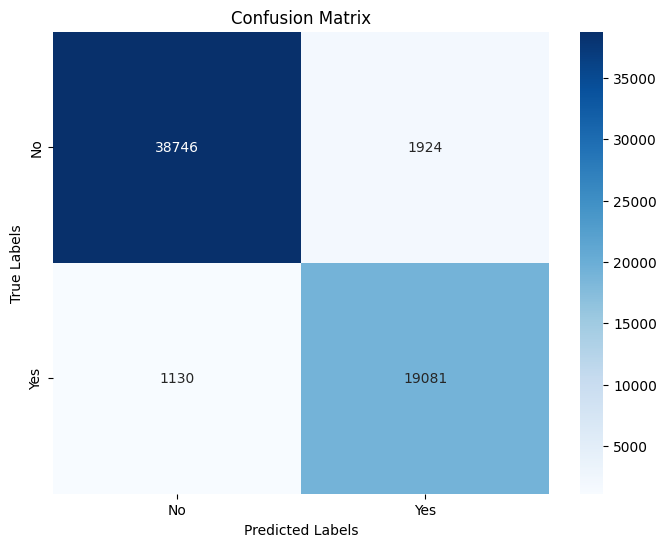

AUC: 0.989


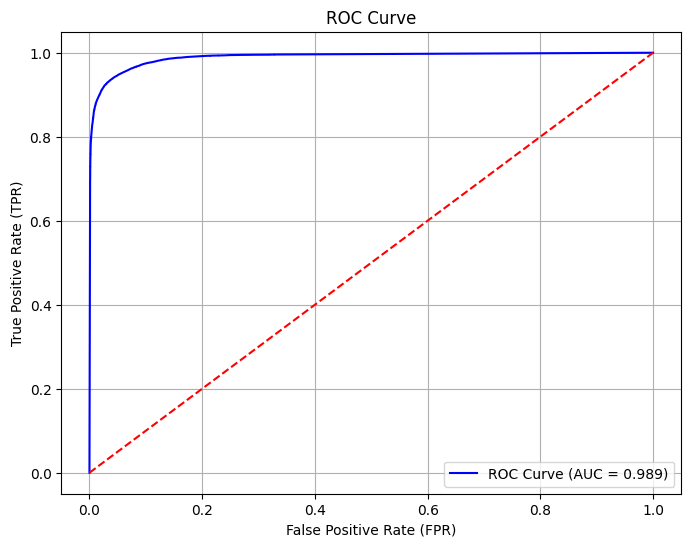

In [79]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Recall: {test_recall:.3f}')  # Print Recall

# Perform k-fold cross-validation
cv_scores = cross_val_score(random_forest_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.3f}')

# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X, y, cv=5)

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting Learning Curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# Calculate the confusion matrix
threshold = 0.3  # Set a threshold for binary classification
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to class labels

cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')  # X-axis label
plt.ylabel('True Labels')       # Y-axis label
plt.title('Confusion Matrix')   # Title of the plot
plt.show()                      # Display the plot

# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC value
print(f'AUC: {auc:.3f}')  # Display the AUC value with three decimal places

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate (FPR)')  # X-axis label
plt.ylabel('True Positive Rate (TPR)')    # Y-axis label
plt.title('ROC Curve')                     # Title of the plot
plt.legend(loc='lower right')              # Legend location
plt.grid()                                 # Add a grid for better readability
plt.show()                                 # Display the plot



KNN Classifier

Training Accuracy: 0.955
Test Accuracy: 0.949
Recall: 0.936
Cross-Validation Scores (Accuracy): [0.74859151 0.96989208 0.97109115 0.97201097 0.9713042 ]
Mean CV Score (Accuracy): 0.927


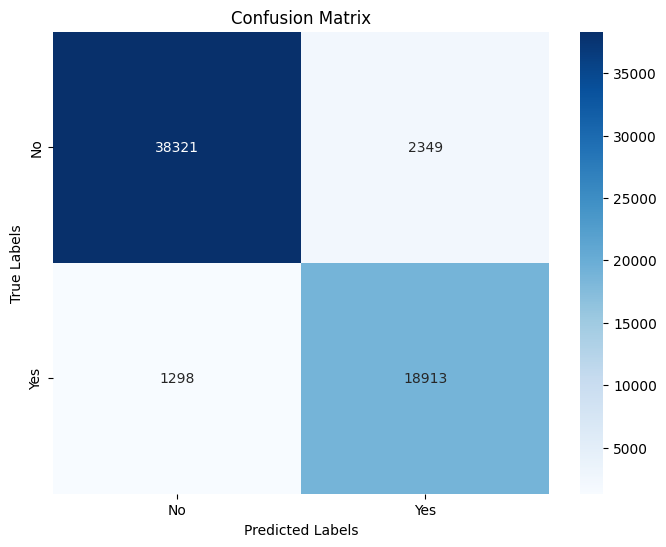

AUC: 0.976


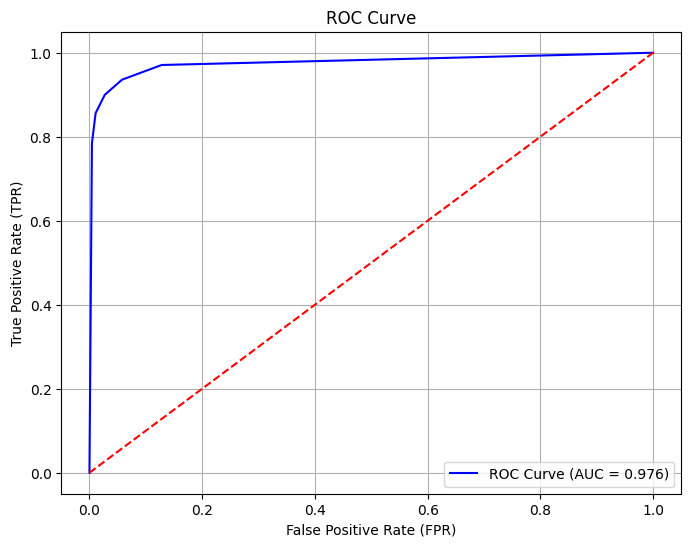

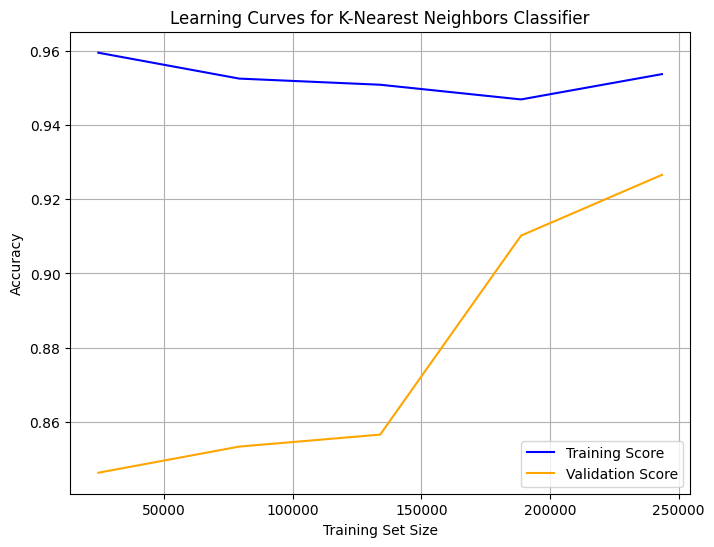

In [80]:
# Create and train the K-Nearest Neighbors Classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate evaluation metrics (Accuracy)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

# Define a threshold to convert predicted probabilities to binary labels
threshold = 0.3  # Adjust this threshold based on your problem
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1
y_pred_binary = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to binary labels

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

print(f'Recall: {recall:.3f}')

# Perform k-fold cross-validation (using accuracy as the scoring metric)
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f'Cross-Validation Scores (Accuracy): {cv_scores}')
print(f'Mean CV Score (Accuracy): {cv_scores.mean():.3f}')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.3f}')

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(knn_model, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting Learning Curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves for K-Nearest Neighbors Classifier')
plt.legend()
plt.grid()
plt.show()


                       Model  Accuracy    Recall       AUC
0        Logistic Regression  0.921240  0.847360  0.976159
1          Gradient Boosting  0.956522  0.921033  0.991442
2              Random Forest  0.956144  0.915739  0.989113
3  K-Nearest Neighbors (KNN)  0.948572  0.899906  0.975641


<Figure size 1200x600 with 0 Axes>

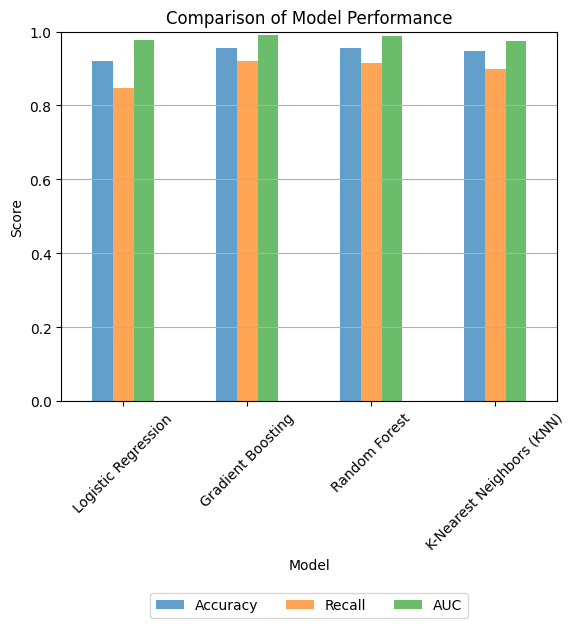

In [81]:
# Initialize a dictionary to store the results
results = {}

# 1. Logistic Regression
y_test_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 2. Gradient Boosting
y_test_pred = gradient_boosting_model.predict(X_test)
y_pred_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]

results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 3. Random Forest
y_test_pred = random_forest_model.predict(X_test)
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 4. K-Nearest Neighbors (KNN)
y_test_pred = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

results['K-Nearest Neighbors (KNN)'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Display the results
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['Accuracy', 'Recall', 'AUC']].plot(kind='bar', alpha=0.7)
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.show()


GridSearch for best hyperparameters with Gradient Boosting

In [ ]:
# Define the model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'max_depth': [3, 5, 7],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required per leaf
    'subsample': [0.8, 1.0],              # Proportion of samples used per tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with cross-validation
grid_search.fit(X_train, y_train)

# View the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Training Accuracy: 0.961
Test Accuracy: 0.959
Test Recall: 0.920
Cross-Validation Scores: [0.75636077 0.98094644 0.98138992 0.98073291 0.98161958]
Mean CV Score: 0.936


/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/miguelmendes/.virtualenvs/s01/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/miguelmendes/.virtualenvs/s01/lib/pyt

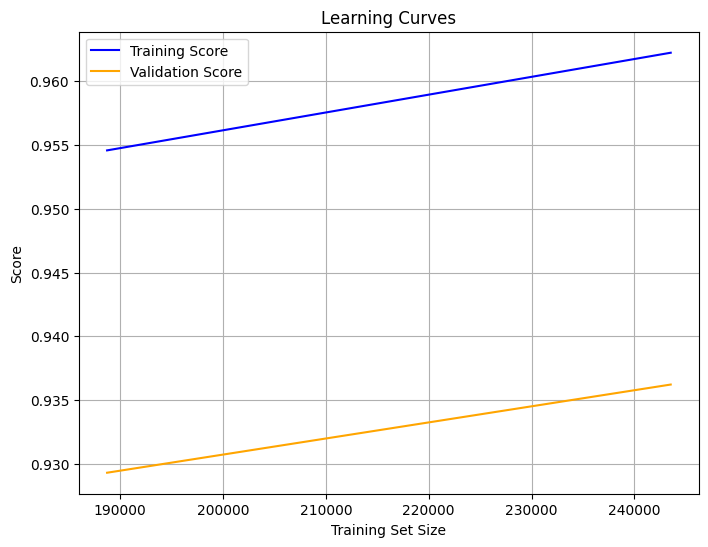

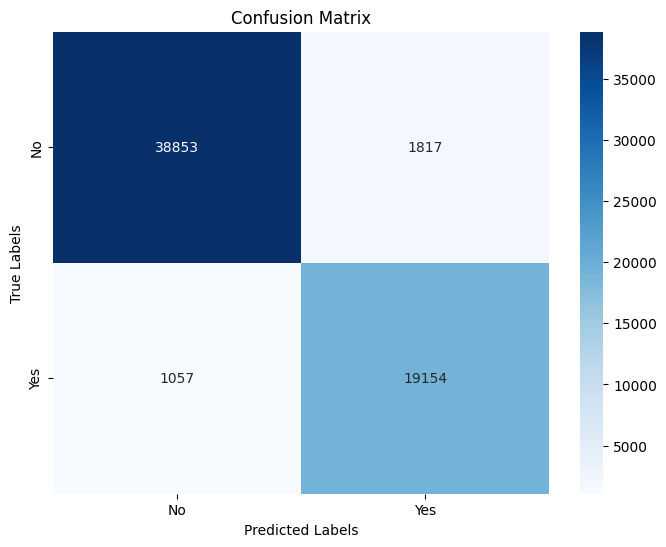

AUC: 0.993


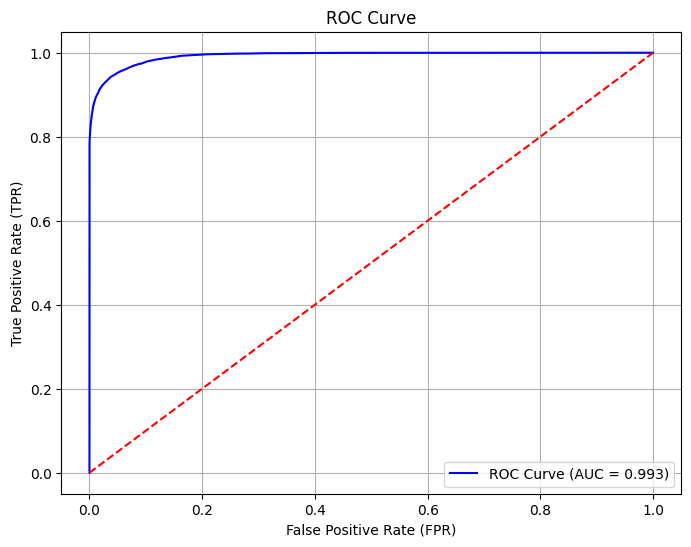

Model trained and saved to 'gradient_boosting_model.pkl'.


In [105]:
# Use the best hyperparameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200,
    'subsample': 1.0
}

# Create and train the Gradient Boosting model with the best parameters
gradient_boosting_model_hyper = GradientBoostingClassifier(**best_params, random_state=42)

gradient_boosting_model_hyper.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = gradient_boosting_model_hyper.predict(X_train)
y_test_pred = gradient_boosting_model_hyper.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Recall: {test_recall:.3f}')  # Print Recall

# Perform k-fold cross-validation
cv_scores = cross_val_score(gradient_boosting_model_hyper, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.3f}')

# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_model_hyper, X, y, cv=5)

# Calculate the mean and standard deviation for training scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting Learning Curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# Calculate the confusion matrix
threshold = 0.3  # Set a threshold for binary classification
y_pred_prob = gradient_boosting_model_hyper.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to class labels

cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')  # X-axis label
plt.ylabel('True Labels')       # Y-axis label
plt.title('Confusion Matrix')   # Title of the plot
plt.show()                      # Display the plot

# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC value
print(f'AUC: {auc:.3f}')  # Display the AUC value with three decimal places

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate (FPR)')  # X-axis label
plt.ylabel('True Positive Rate (TPR)')    # Y-axis label
plt.title('ROC Curve')                     # Title of the plot
plt.legend(loc='lower right')              # Legend location
plt.grid()                                 # Add a grid for better readability
plt.show()                                 # Display the plot


# Save the trained model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')
print("Model trained and saved to 'gradient_boosting_model.pkl'.")


In [83]:
# Replace the meta-model (second level) with Gradient Boosting
meta_model = gradient_boosting_model

# Define the StackingClassifier with the three base models
stacking_model = StackingClassifier(
    estimators=[('gradient_boosting', gradient_boosting_model), 
                ('random_forest', random_forest_model), 
                ('knn', knn_model)], 
    final_estimator=meta_model,  # Use Gradient Boosting as the meta-model
    cv=5  # Internal cross-validation for the base models
)

# Train the StackingClassifier
stacking_model.fit(X_train, y_train)

# Make predictions with the stacked model
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Evaluate the performance of the stacked model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Recall: {test_recall:.3f}')

# Evaluate the performance of the stacked model with cross-validation
cv_scores = cross_val_score(stacking_model, X, y, cv=5, scoring='recall')
print(f'Cross-Validation Recall Scores: {cv_scores}')
print(f'Mean CV Recall Score: {cv_scores.mean():.3f}')


Training Accuracy: 0.961
Test Accuracy: 0.958
Test Recall: 0.920
Cross-Validation Recall Scores: [0.35899078 0.98635065 0.98571006 0.98723761 0.98659636]
Mean CV Recall Score: 0.861


                       Model  Accuracy    Recall       AUC
0        Logistic Regression  0.921240  0.847360  0.976159
1          Gradient Boosting  0.956522  0.921033  0.991442
2              Random Forest  0.956144  0.915739  0.989113
3  K-Nearest Neighbors (KNN)  0.948572  0.899906  0.975641
4    Gradient Boosting Hyper  0.958936  0.920241  0.992527
5                   Stacking  0.957885  0.920439  0.991898


<Figure size 1200x600 with 0 Axes>

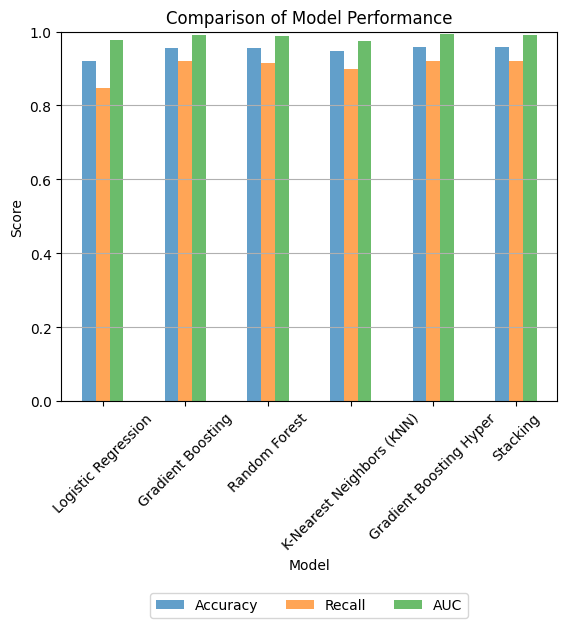

In [84]:
# Initialize a dictionary to store the results
results = {}

# 1. Logistic Regression
y_test_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 2. Gradient Boosting
y_test_pred = gradient_boosting_model.predict(X_test)
y_pred_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]

results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 3. Random Forest
y_test_pred = random_forest_model.predict(X_test)
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 4. K-Nearest Neighbors (KNN)
y_test_pred = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

results['K-Nearest Neighbors (KNN)'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 5. Gradient Boosting with Hyperparameters
y_test_pred = gradient_boosting_model_hyper.predict(X_test)
y_pred_prob = gradient_boosting_model_hyper.predict_proba(X_test)[:, 1]

results['Gradient Boosting Hyper'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# 6. Stacking Model
y_test_pred = stacking_model.predict(X_test)
y_pred_prob = stacking_model.predict_proba(X_test)[:, 1]

results['Stacking'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_pred_prob)
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Display the results
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['Accuracy', 'Recall', 'AUC']].plot(kind='bar', alpha=0.7)
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.show()


The best performing model, Gradient Boosting with hyperparameter tuning, achieved an accuracy of 95.9%, a recall of 92.0%, and an AUC of 0.993. This version of the model demonstrates excellent predictive power and a high degree of differentiation between positive and negative cases, making it ideal for real-world application in heart disease risk prediction.

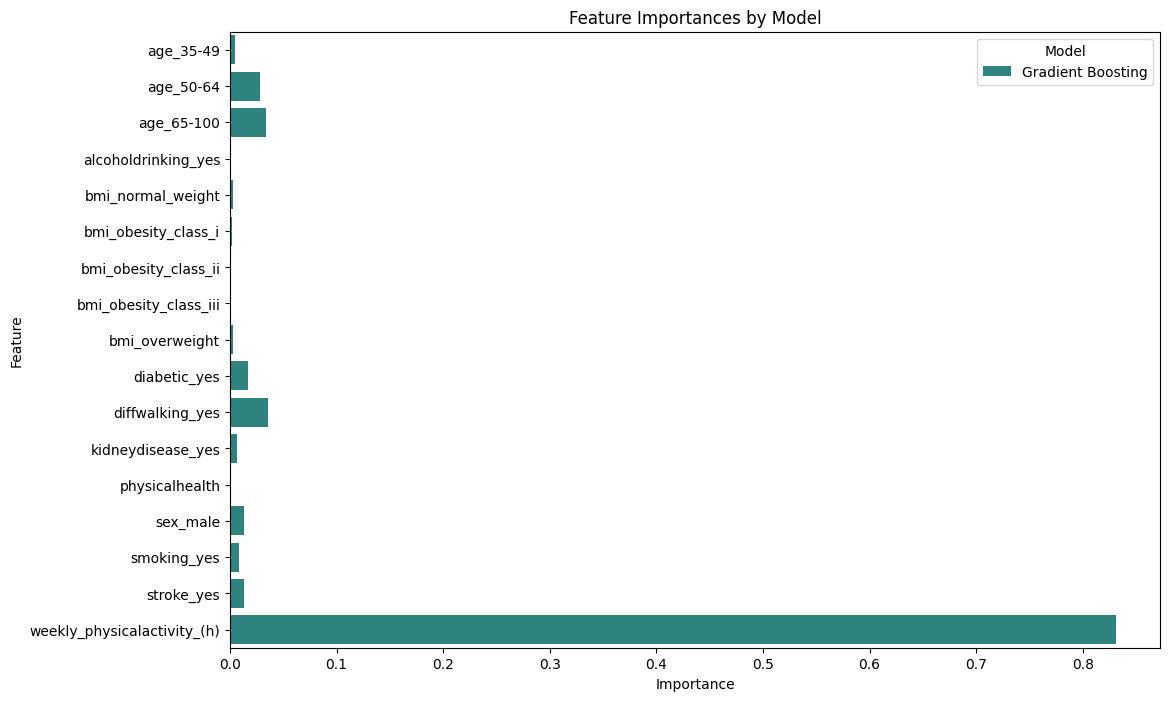

In [88]:
# Define the models you want to compare
models = {
    'Gradient Boosting with Hyperparameters': gradient_boosting_model_hyper,
    
}

# Dictionary to store feature importances for each model
feature_importances_df = pd.DataFrame()

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Check if the model has the attribute 'feature_importances_' or 'coef_'
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # For Logistic Regression, take the absolute value of coefficients
    else:
        importances = np.zeros(X_train.shape[1])  # Placeholder if model does not provide feature importances
    
    # Append to DataFrames
    temp_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances,
        'Model': model_name
    })
    feature_importances_df = pd.concat([feature_importances_df, temp_df], ignore_index=True)

# Plot the feature importances for each model
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=feature_importances_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances by Model')
plt.legend(title='Model')
plt.show()


Testing the model

In [104]:
# Load the trained model
loaded_model = gradient_boosting_model_hyper

# Prepare new data for predictions
# Example new data with boolean features, replace this with your actual new data
new_data = pd.DataFrame({
    'age_35-49': [False],  # True if in the age range, False otherwise
    'age_50-64': [False],
    'age_65-100': [True],
    'alcoholdrinking_yes': [False],
    'bmi_normal_weight': [False],
    'bmi_obesity_class_i': [True],
    'bmi_obesity_class_ii': [False],
    'bmi_obesity_class_iii': [False],
    'bmi_overweight': [False],
    'diabetic_yes': [True],
    'diffwalking_yes': [False],
    'kidneydisease_yes': [False],
    'physicalhealth': [2],  # This should be numeric
    'sex_male': [True],  # True if male, False if female
    'smoking_yes': [True],
    'stroke_yes': [False],
    'weekly_physicalactivity_(h)': [0]  # This should be numeric
})

# Ensure new_data has the same columns as your training features
# Predict probabilities for heart disease
predicted_probabilities = loaded_model.predict_proba(new_data)[:, 1]  # Get the probability of the positive class (heart disease)

# Print the predicted probabilities of having heart disease
print("Predicted probability of having heart disease:")
print(predicted_probabilities)



Predicted probability of having heart disease:
[0.46967642]
